<a href="https://colab.research.google.com/github/MahithaPoduvu/Mahitha_INFO5731_-Spring2023/blob/main/In_class_exercise_04_03282023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# I have taken tweets data
import pandas as pd # for dataframes
import numpy as np  # for arrays

import re
import string

import spacy # for preprocessing of text

import gensim # for topic modelling
from gensim import corpora

# libraries for visualization
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/twitter_data.csv')
df.head()


In [ ]:
# Remove punctuation
df['tweets_processed'] = \
df['tweets'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['tweets_processed'] = \
df['tweets_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['tweets_processed'].head()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['tweets_processed']=df['tweets_processed'].apply(remove_stopwords)

In [ ]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output


In [ ]:
text_list=df['tweets_processed'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)
lda_model.print_topics()

In [17]:
# Visualize the topics
pyLDAvis.enable_notebook()
topicData = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary, mds='mmds') 
topicData

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.064134  0.171600       1        1  40.518543
9      0.042471 -0.201731       2        1  26.293220
8     -0.159385 -0.051679       3        1  11.008188
4     -0.085688  0.102830       4        1   6.920592
3      0.050278 -0.089425       5        1   6.241881
2      0.118257  0.034065       6        1   6.241875
0     -0.007508  0.008590       7        1   0.693925
5     -0.007549  0.008566       8        1   0.693925
6     -0.007544  0.008573       9        1   0.693925
7     -0.007466  0.008611      10        1   0.693925, topic_info=        Term      Freq     Total Category  logprob  loglift
4   pandemic  4.000000  4.000000  Default  30.0000  30.0000
5     people  3.000000  3.000000  Default  29.0000  29.0000
10      mask  2.000000  2.000000  Default  28.0000  28.0000
49      case  4.000000  4.000000  Default  27.0000  27.0000
6      start  3.000000  3.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
2      death  0.010778  4.038308  Topic10  -4.5433  -0.9555
5     people  0.010778  3.718840  Topic10  -4.5433  -0.8731
6      start  0.010778  3.198014  Topic10  -4.5433  -0.7222
7          #  0.010778  2.274120  Topic10  -4.5433  -0.3813
10      mask  0.010778  2.299670  Topic10  -4.5433  -0.3925

[404 rows x 6 columns], token_table=      Topic      Freq Term
term                      
7         1  0.439730    #
7         4  0.439730    #
7         6  0.439730    #
0         1  0.457370    %
0         2  0.304914    %
...     ...       ...  ...
58        1  0.953139    |
70        1  0.794900    ⬇
71        1  0.794900  ️(4
59        1  0.953139    🔺
60        1  0.794900    🔻

[107 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 9, 5, 4, 3, 1, 6, 7, 8])

In [18]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

#to compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -4.0762350079399265

Coherence Score:  0.34555783072256296


In [71]:

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...
vect_text=vect.fit_transform(df['tweets_processed'])
print(vect_text.shape)
print(vect_text)

(11, 185)
  (0, 31)	0.27805658778879133
  (0, 166)	0.10826529925119473
  (0, 92)	0.10826529925119473
  (0, 18)	0.27805658778879133
  (0, 134)	0.1686358487684788
  (0, 7)	0.27805658778879133
  (0, 103)	0.18679490241233915
  (0, 15)	0.27805658778879133
  (0, 81)	0.27805658778879133
  (0, 41)	0.27805658778879133
  (0, 42)	0.27805658778879133
  (0, 4)	0.27805658778879133
  (0, 182)	0.18679490241233915
  (0, 68)	0.15328258767613198
  (0, 13)	0.18679490241233915
  (0, 65)	0.09959904886278628
  (0, 70)	0.18679490241233915
  (0, 43)	0.18679490241233915
  (0, 9)	0.18679490241233915
  (0, 132)	0.15328258767613198
  (0, 160)	0.1686358487684788
  (0, 156)	0.18679490241233915
  (1, 89)	0.2323072890409391
  (1, 87)	0.2323072890409391
  (1, 147)	0.2323072890409391
  :	:
  (9, 68)	0.1595754959715877
  (9, 13)	0.19446363510246772
  (9, 65)	0.10368801741629488
  (9, 70)	0.19446363510246772
  (9, 43)	0.19446363510246772
  (9, 9)	0.19446363510246772
  (9, 132)	0.1595754959715877
  (9, 160)	0.1755590743462

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(11, 10)
[[0.01821394 0.83607556 0.0182137  0.01821373 0.01821362 0.01821383
  0.01821359 0.01821414 0.01821386 0.01821403]
 [0.01801442 0.01801409 0.83787351 0.01801428 0.01801382 0.01801407
  0.01801405 0.01801418 0.01801389 0.01801369]
 [0.01856889 0.01856967 0.01856889 0.01856911 0.01856892 0.83287811
  0.01856858 0.01856925 0.01856949 0.01856908]
 [0.01728398 0.01728389 0.01728396 0.01728451 0.01728383 0.01728383
  0.01728425 0.01728374 0.01728412 0.8444439 ]
 [0.01888182 0.01888227 0.01888205 0.01888188 0.01888189 0.01888548
  0.01888145 0.0188822  0.83005909 0.01888188]
 [0.01878955 0.01878979 0.01878988 0.01878961 0.01879044 0.01878989
  0.01879    0.0187901  0.01878991 0.83089085]
 [0.01475884 0.01475895 0.01475893 0.01475889 0.86716995 0.0147589
  0.01475887 0.01475891 0.01475917 0.0147586 ]
 [0.01631626 0.01631629 0.01631633 0.01631618 0.01631654 0.01631641
  0.01631634 0.01631631 0.85315336 0.01631599]
 [0.01642899 0.01642872 0.01642856 0.01642872 0.85214255 0.01642849
  0.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

0.9999999999999999


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.8213935128014673 %
Topic  1 :  83.6075555203335 %
Topic  2 :  1.8213701587974664 %
Topic  3 :  1.8213730173519724 %
Topic  4 :  1.8213619574416196 %
Topic  5 :  1.8213831801064388 %
Topic  6 :  1.8213591109278564 %
Topic  7 :  1.8214143396516738 %
Topic  8 :  1.8213863804657109 %
Topic  9 :  1.82140282212228 %


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.87031064 0.81812982 0.81044036 ... 0.87454642 0.812998   0.89819264]
 [0.89717215 0.93999696 0.84537659 ... 0.95630222 0.81654276 0.81158523]
 [0.74986867 0.7022195  0.72900767 ... 0.73186888 0.95228048 0.85745392]
 ...
 [0.73955588 0.69709034 0.77552262 ... 0.93729426 0.88336782 0.74039036]
 [0.87890547 0.88479398 0.87617297 ... 0.95013637 0.86796055 0.86698294]
 [0.73963868 0.83624372 0.60987556 ... 0.84025969 0.76132931 0.83174612]]
(10, 185)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
outdoor developed people sent india start tested 10310 areas flight 

Topic 1: 
since alaska 11 97 8pyh3ohnel killed collisions genome covid manage 

Topic 2: 
154 recovery required outdoor sk stabilized macao 1123 primed episode 

Topic 3: 
genome immune samples euud35yrff jhuapl home 11 lt peter_thielen 8pyh3ohnel 

Topic 4: 
016 ims doctor mid body minhealthnz pain manage junior working 

Topic 5: 
200 gxiobrim5x genome tests deaths since fires tpr bd 31790 

Topic 6: 
mount states home schools profession full mild ircytgbyh6 order episode 

Topic 7: 
new starting required kl schools males scientists 1971 stronger govt 

Topic 8: 
sequence 1986 cerritos eden 11798 deaths mid americans chrishipkins nanopore 

Topic 9: 
pcr trvjnwonwe since 6uxjft67xw pandemic 11 challenges required immunology genome 



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [60]:
#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/twitter_data.csv')
# Remove punctuation
df['tweets_processed'] = \
df['tweets'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['tweets_processed'] = \
df['tweets_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['tweets_processed'].head()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['tweets_processed']=df['tweets_processed'].apply(remove_stopwords)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \.
<>:7: DeprecationWarning: invalid escape sequence \.
<ipython-input-60-05b0678d34f6>:7: DeprecationWarning: invalid escape sequence \.
  df['tweets'].map(lambda x: re.sub('[,\.!?]', '', x))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output
text_list=df['tweets_processed'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


masks required people staying outdoor areas #macao scrap mask-wearing order starting february 27 #covid19 stabilized city: sar govt https://tco/hn2ztorzvt
['mask', 'people', 'outdoor', 'area', 'scrap', 'mask', 'order', '#', 'covid19', 'city']


In [ ]:

#LSA implemented with TF
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...
vect_text=vect.fit_transform(df['tweets_processed'])
print(vect_text.shape)
print(vect_text)

In [65]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 7.20164250e-01 -1.16298596e-01 -6.71122401e-02  1.60732261e-02
  -1.05584081e-02 -7.24763214e-03  8.87126943e-03 -2.93075356e-01
   6.13940910e-01 -1.98080762e-15]
 [ 1.40251482e-01  5.41658474e-02  5.00407641e-01  1.79825798e-01
   6.56285367e-01  1.02939830e-01 -5.02891131e-01  5.71792554e-03
   2.20191570e-03  5.71113410e-16]
 [ 7.34735699e-01 -1.16576328e-01 -6.50179352e-02  1.54636602e-02
  -1.01031354e-02 -6.90843584e-03  8.41425085e-03 -1.89611686e-01
  -3.35534862e-01 -5.41552532e-01]
 [ 1.07252999e-01  4.90640736e-02  5.48886340e-01 -1.31071098e-01
  -6.13078477e-01 -3.82906887e-01 -3.80635960e-01  3.85211418e-03
   1.51441631e-03 -4.32223670e-17]
 [ 6.80018868e-01 -1.14723331e-01 -7.26388774e-02  1.77565057e-02
  -1.18560453e-02 -8.23528022e-03  1.02377067e-02  7.16313215e-01
   7.34876137e-02  1.47977817e-16]
 [ 1.22517065e-01  4.66570406e-02  3.88560294e-01 -5.86474878e-01
  -8.70978835e-02  6.64835113e-01  1.95284451e-01  4.78084109e-03
   1.83313932e-03 -2.39965852e-16

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  72.01642504639044
Topic  1  :  -11.62985962705541
Topic  2  :  -6.711224011505566
Topic  3  :  1.60732261261331
Topic  4  :  -1.0558408088396758
Topic  5  :  -0.7247632143086266
Topic  6  :  0.8871269430008074
Topic  7  :  -29.307535642691683
Topic  8  :  61.39409098037466
Topic  9  :  -1.9808076201168877e-13


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 185)
[[ 1.33688540e-02  1.33688540e-02  2.05519146e-02 ...  2.44741836e-01
   9.73454032e-02  1.06751211e-02]
 [ 8.76405021e-02  8.76405021e-02  1.46397946e-01 ... -5.96814223e-02
  -2.33178400e-02  8.36325222e-02]
 [-2.65518344e-02 -2.65518344e-02 -3.60855233e-02 ... -4.77976479e-02
  -1.79745505e-02 -1.56651289e-02]
 ...
 [-3.53363924e-04 -3.53363924e-04  5.25092388e-04 ... -1.18312424e-02
  -8.17989655e-02  9.67676923e-04]
 [-5.82477565e-04 -5.82477565e-04  2.27123102e-04 ... -5.67897293e-03
  -1.59876241e-01  8.48192089e-04]
 [-7.54145174e-17  1.32549270e-17 -5.01609087e-17 ...  7.42169058e-17
   2.67261242e-01 -2.74716077e-17]]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
1144461 168 americans died killed since worldwide people start deaths 

Topic 1: 
cases new active states amp 021 104494 154 2149 218 

Topic 2: 
nanopore using mask immunology full amp covid19 27 areas city 

Topic 3: 
amp mask avoided body brain chrishipkins drayeshaverrall dropped exhaustion fog 

Topic 4: 
27 areas city february govt hn2ztorzvt macao masks order outdoor 

Topic 5: 
immunology 6uxjft67xw biomedicalscience career careers clinicianscientist doctor episode interest junior 

Topic 6: 
amp baseline challenges future immune iuuz9jlsnc males mild mount primed 

Topic 7: 
1986 13956 82 air cerritos collisions euud35yrff mid immunology cases 

Topic 8: 
10310 111 1866s 1971 5bdibip6wt airlines alaska flight 1986 13956 

Topic 9: 
11798 1904 8zz9fcrqlw 97 eden train wrecks mask 27 areas 



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [21]:
!pip install lda2vec
!pip install pyLDAvis
!pip install preprocess
!pip install Corpus

import pyLDAvis
import pyLDAvis.gensim_models
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
import preprocess
import Corpus

pyLDAvis.enable_notebook()
#from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Corpus: filename=Corpus-0.4.2-py3-none-any.whl size=88795 sha256=01b0832889427d0f893cee2cff6f88b1a0d45c195d6241f1fe4c53cabfbbfc14
  Stored in directory: /root/.cache/pip/wheels/73/b1/96/d08538d62b0ad5b467fe9080873b4dbfe011044d687656939c
Successfully built Corpus


In [27]:

npz = np.load('/content/gdrive/MyDrive/topics.pyldavis.npz', encoding='bytes')
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()

In [28]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print (msg)
    topic_to_topwords[j] = top_words

Topic 0 jesus god orthodox faith verse worship belief christianity christian mormon
Topic 1 bike tire honda battery brake ride valve aluminum intake jeep
Topic 2 game team play win baseball score playoff mets goal phillies
Topic 3 shuttle nasa space payload computational planetary satellite mission launch lunar
Topic 4 armenian troop cyprus israel soldier agdam bayonet terror bullet he
Topic 5 drive controller battery dock connector ink card slot pin vram
Topic 6 key encrypt cryptosystem encryption cryptography secure rsa crypto eavesdrop decrypt
Topic 7 ride revolver bike bikers go jeep i dog a tank
Topic 8 homicide gun handgun firearm fbi unconstitutional federal smuggle drug weapon
Topic 9 israel armenian plo cyprus troop lebanese arab palestinian syria turkish
Topic 10 armenian bayonet arena team turkish tartar nhl playoff game defenseman
Topic 11 widget server contrib font editor format mit pixmap toolkit binary
Topic 12 controller card disk bios rom vram drive isa vga trident
Top

In [30]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')
pyLDAvis.display(prepared_data)

In [32]:
from sklearn.datasets import fetch_20newsgroups
remove=('headers', 'footers', 'quotes')
texts = fetch_20newsgroups(subset='train', remove=remove).data

SyntaxError: ignored

In [35]:
print (texts[1])

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.


In [37]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][1]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print(msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text))

07% in topic 01 which has top words bike, tire, honda, battery, brake, ride, valve, aluminum, intake, jeep
02% in topic 03 which has top words shuttle, nasa, space, payload, computational, planetary, satellite, mission, launch, lunar
24% in topic 05 which has top words drive, controller, battery, dock, connector, ink, card, slot, pin, vram
05% in topic 11 which has top words widget, server, contrib, font, editor, format, mit, pixmap, toolkit, binary
23% in topic 12 which has top words controller, card, disk, bios, rom, vram, drive, isa, vga, trident
22% in topic 13 which has top words cd, shuttle, sale, frequency, antenna, disc, space, shipping, offer, model
12% in topic 19 which has top words font, icon, window, server, editor, format, disk, card, terminal, i


<BarContainer object of 20 artists>

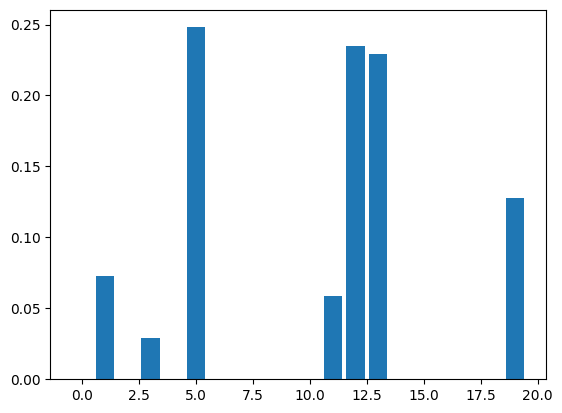

In [38]:
plt.bar(np.arange(20), dat['doc_topic_dists'][1])

In [39]:
print(texts[51]) 

I have been following this thread on talk.religion,
soc.religion.christian.bible-study and here with interest.  I am amazed at
the different non-biblical argument those who oppose the Sabbath present. 

One question comes to mind, especially since my last one was not answered
from Scripture.  Maybe clh may wish to provide the first response.

There is a lot of talk about the Sabbath of the TC being ceremonial. 
Answer this:

Since the TC commandments is one law with ten parts on what biblical
basis have you decided that only the Sabbath portion is ceremonial?
OR You say that the seventh-day is the Sabbath but not applicable to
Gentile Christians.  Does that mean the Sabbath commandment has been
annulled?  References please.

If God did not intend His requirements on the Jews to be applicable to
Gentile Christians why did He make it plain that the Gentiles were now
grafted into the commonwealth of Israel?

Darius


In [41]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][51]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print (msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text))

50% in topic 00 which has top words jesus, god, orthodox, faith, verse, worship, belief, christianity, christian, mormon
47% in topic 17 which has top words jesus, messiah, verse, orthodox, god, psalm, apostle, faith, luke, divine
01% in topic 18 which has top words quack, blood, lyme, jesus, infant, orthodox, substance, god, candida, msg


<BarContainer object of 20 artists>

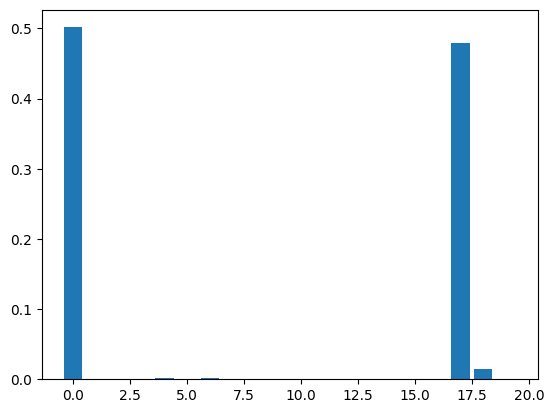

In [42]:
plt.bar(np.arange(20), dat['doc_topic_dists'][51])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [139]:
# Here I have taken realdonaltrump tweets from kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/realdonaldtrump.csv')
df.head()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


id                                               link  \
0  1.698309e+09  https://twitter.com/realDonaldTrump/status/169...   
1  1.701461e+09  https://twitter.com/realDonaldTrump/status/170...   
2  1.737480e+09  https://twitter.com/realDonaldTrump/status/173...   
3  1.741161e+09  https://twitter.com/realDonaldTrump/status/174...   
4  1.773561e+09  https://twitter.com/realDonaldTrump/status/177...   

                                             content            date  \
0  Be sure to tune in and watch Donald Trump on L...  5/4/2009 13:54   
1  Donald Trump will be appearing on The View tom...  5/4/2009 20:00   
2  Donald Trump reads Top Ten Financial Tips on L...   5/8/2009 8:38   
3  New Blog Post: Celebrity Apprentice Finale and...  5/8/2009 15:40   
4  "My persona will never be that of a wallflower...  5/12/2009 9:07   

   retweets  favorites mentions hashtags  
0       510        917      NaN      NaN  
1        34        267      NaN      NaN  
2        13         19      NaN      NaN  
3        11         26      NaN      NaN  
4      1375       1945      NaN      NaN

In [140]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


df['clean_text'] = df['content'].apply(clean_text)
df.head()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:19: DeprecationWarning: invalid escape sequence \(
<>:19: DeprecationWarning: invalid escape sequence \(
<ipython-input-140-9a064ee315d8>:19: DeprecationWarning: invalid escape sequence \(
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


id                                               link  \
0  1.698309e+09  https://twitter.com/realDonaldTrump/status/169...   
1  1.701461e+09  https://twitter.com/realDonaldTrump/status/170...   
2  1.737480e+09  https://twitter.com/realDonaldTrump/status/173...   
3  1.741161e+09  https://twitter.com/realDonaldTrump/status/174...   
4  1.773561e+09  https://twitter.com/realDonaldTrump/status/177...   

                                             content            date  \
0  Be sure to tune in and watch Donald Trump on L...  5/4/2009 13:54   
1  Donald Trump will be appearing on The View tom...  5/4/2009 20:00   
2  Donald Trump reads Top Ten Financial Tips on L...   5/8/2009 8:38   
3  New Blog Post: Celebrity Apprentice Finale and...  5/8/2009 15:40   
4  "My persona will never be that of a wallflower...  5/12/2009 9:07   

   retweets  favorites mentions hashtags  \
0       510        917      NaN      NaN   
1        34        267      NaN      NaN   
2        13         19      NaN      NaN   
3        11         26      NaN      NaN   
4      1375       1945      NaN      NaN   

                                          clean_text  
0  sure tune watch donald trump late night david ...  
1  donald trump appearing view tomorrow morning d...  
2  donald trump reads top ten financial tips late...  
3  new blog post celebrity apprentice finale less...  
4   persona never wallflower rather build walls c...

In [ ]:
df.drop(['Unnamed:7','Unnamed:8','Unnamed:9','Unnamed:10','Unnamed:11','Unnamed:12','Unnamed:13','Unnamed:14','Unnamed:15','Unnamed:16','Unnamed:17','Unnamed:18','Unnamed:19','Unnamed:20'],axis=1,inplace=True)

In [ ]:
! pip install bertopic

In [141]:
from bertopic import BERTopic
tweets = df.clean_text.to_list()
print(tweets)
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(tweets)
print(probs)
print(topics)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.15796571 0.         0.         ... 0.64858493 0.47964213 0.71158869]
[293, -1, -1, 1, -1, 207, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 104, -1, 135, 135, -1, 213, 27, 55, -1, 87, -1, -1, -1, -1, -1, 251, -1, 79, 293, 19, 19, -1, 190, -1, -1, 79, 79, -1, 79, 41, -1, 244, 103, -1, 1, 88, 79, 2, -1, -1, -1, 52, 228, 1, 1, -1, -1, -1, 15, -1, 1, -1, -1, 386, 2, 47, 15, -1, 2, 71, 179, 2, 52, 52, 52, 19, 34, 52, 52, 52, 19, 19, 73, 363, 19, 19, 1, 79, 1, 79, 363, -1, 1, -1, -1, -1, 6, 491, 2, 491, 491, -1, -1, 19, 299, 15, 15, 142, 507, 52, -1, 491, -1, 251, 2, 216, 491, 1, -1, 2, 171, 291, -1, -1, 365, 39, -1, 19, 19, 446, -1, 2, 365, 365, 365, 39, 365, 1, 19, 19, 19, 19, 2, 71, 293, 15, 103, -1, -1, 1, 6, 220, 1, 52, 1, -1, 1, -1, 2, 1, 2, 1, -1, 1, 1, 1, 87, 1, 1, 87, 1, -1, 6, 491, 1, 244, -1, 1, 1, 1, 15, 15, 15, 491, 491, -1, 375, 86, -1, 86, -1, 2, 4, -1, 52, 2, -1, 78, 218, 268, -1, 7, 190, 2, 294, -1, -1, -1, 253, -1, 1, 253, 253, 1, 1, -1, -1, 1, 253, 10

In [142]:
topic_model.get_topic_info()



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic  Count                                             Name
0       -1  17527            -1_realdonaldtrump_trump_obama_donald
1        0    911                        0_fake_news_media_nytimes
2        1    617         1_apprentice_apprenticenbc_celebrity_nbc
3        2    616                 2_golf_course_scotland_turnberry
4        3    612                       3_run_please_needs_country
..     ...    ...                                              ...
510    509     10                  509_dnc_smocking_russia_russian
511    510     10                 510_borders_treaties_secure_rule
512    511     10                     511_hunter_phony_hunts_witch
513    512     10  512_usapic_marizi_geauxtigerspic_confirmgorsuch
514    513     10        513_commercials_commercial_ads_mediafraud

[515 rows x 3 columns]

In [143]:
topic_model.visualize_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [145]:
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [146]:
topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scip

In [148]:
bigram_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, n_gram_range=(2, 2))
bigram_topics, bigram_probs = bigram_topic_model.fit_transform(tweets)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Batches:   0%|          | 0/1355 [00:00<?, ?it/s]

2023-04-03 01:01:16,456 - BERTopic - Transformed documents to Embeddings
2023-04-03 01:02:16,126 - BERTopic - Reduced dimensionality
2023-04-03 01:17:45,488 - BERTopic - Clustered reduced embeddings


In [149]:
bigram_freq = bigram_topic_model.get_topic_info() 
bigram_freq

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic  Count                                               Name
0       -1  17936   -1_donald trump_mr trump_america great_fake news
1        0    929  0_good luck_thanks good_thanks thanks_great th...
2        1    802  1_pic twitter_twitter com_magapic twitter_askt...
3        2    687  2_celebrity apprentice_apprenticenbc realdonal...
4        3    391  3_border security_southern border_open borders...
..     ...    ...                                                ...
523    522     10  522_ever sleep_realdonaldtrump ever_sleep much...
524    523     10  523_nelson mandela_good heart_combination nels...
525    524     10  524_goldman sachs_disclosure form_ted cruz_int...
526    525     10  525_realdonaldtrump brandiglanville_brandiglan...
527    526     10  526_live streaming_signed copy_crippled americ...

[528 rows x 3 columns]

In [150]:
bigram_topic_model.visualize_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [151]:
bigram_topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scip

In [152]:
bigram_topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [153]:
bigram_topic_model.visualize_heatmap(top_n_topics=12, width=800, height=800)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
'''After comparing the results of four topic modelling algorithms, I found Bertopic as better one.The follwing are the reasons
1.It finds the data topics automatically.
2.No preprocessing of the data required in most of cases.
3.Semantic embeddings lead to more meaningful and coherent topics. TF-IDF (bag-of-words) based strategy for topic description.
4.Provides support for hierarchical topic reduction.
5.HDBSCAN leads to more coherent and consistent topics, but at the price of having a significant portion of outliers. K-Means can be used instead to avoid this behaviour.
6.Scales better with larger corpora than traditional models.
7.BERTopic supports dynamic Topic Modeling.
8.Advanced visualization and search tools are available.
9.I intertopic distance map , each cluster has similar topic words embedded.
the main disadvantage if found is it works for larger dataset with different topics in it.

'''
